In [1]:
#for pandas
import pandas as pd

In [2]:
#for numpy
import numpy as np

In [3]:
#for matplotlib
import matplotlib.pyplot as plt


In [4]:
#due to some reason while plotting subplots later in this program there are warnings
#this is to ignore those warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#function to calculate hypothesis function i.e. 1/1+exp(z)
def gz(theta,x):
  hey=(1.0)*(x.dot(theta))
  heyt=1+np.exp((-1)*hey)
  heytt=1/(heyt)
  return heytt

In [6]:
#function to calculate error
def compute_cost(theta,x,y,m,lambo):
  z=gz(theta,x)
  t=(1/m)*np.sum(((-1)*y*np.log(z))-((1-y)*np.log(1-z)))
  t=t+lambo*np.sum(theta**2)
  return t

In [7]:
#scatter plot of training points
def plotpoints(data):
    data=np.array(data)
    x=np.array(data[:,0:2])
    y=np.array(data[:,2])
    on=(y==1).ravel()
    off=(y==0).ravel()
    plt.scatter(x[on,0],x[on,1],c='black',marker="+",alpha=0.9)
    plt.scatter(x[off,0],x[off,1],c='y',marker="o",alpha=0.9)
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.legend(["y==1","y==0"])
    

In [8]:
#function that takes 2 variables as arguments and returns numpy array of their all possible terms upto 6 degree polynomial
def poly(xone,xtwo):
    listy=[1]
    degree=6
    for i in range(1,degree+1):
        for j in range(0,i+1):
          listy.append(((xone**(i-j))*(xtwo**j)))
    a=np.array(listy)
    return a

In [9]:
#function to plot decision boundary
def decbound(theta,data):
  padding=0.1
  data=np.array(data)
  x=data[:,0:2]
  xx = np.linspace((x[:,0].min())-padding,(x[:,0].max())+padding,100)
  xy = np.linspace((x[:,1].min())-padding,(x[:,1].max())+padding,100)
  z = np.zeros((100,100))
  for i, v1 in enumerate(xx):
    for j, v2 in enumerate(xy):
        v = poly(v1,v2)
        z[i,j] =v.dot(theta)

  plt.contour(xx,xy,z,[0])



In [10]:
#location of file containing data
datafileloc="C:/Users/Ritik/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 3/machine-learning-ex2/ex2/Data_2/ex2data2.txt"

In [11]:
#reading csv file
data=pd.read_csv(datafileloc,header=None,names=["Score_1","Score_2","Acceptance_Decision"])

In [12]:
print(data)

      Score_1   Score_2  Acceptance_Decision
0    0.051267  0.699560                    1
1   -0.092742  0.684940                    1
2   -0.213710  0.692250                    1
3   -0.375000  0.502190                    1
4   -0.513250  0.465640                    1
5   -0.524770  0.209800                    1
6   -0.398040  0.034357                    1
7   -0.305880 -0.192250                    1
8    0.016705 -0.404240                    1
9    0.131910 -0.513890                    1
10   0.385370 -0.565060                    1
11   0.529380 -0.521200                    1
12   0.638820 -0.243420                    1
13   0.736750 -0.184940                    1
14   0.546660  0.487570                    1
15   0.322000  0.582600                    1
16   0.166470  0.538740                    1
17  -0.046659  0.816520                    1
18  -0.173390  0.699560                    1
19  -0.478690  0.633770                    1
20  -0.605410  0.597220                    1
21  -0.628

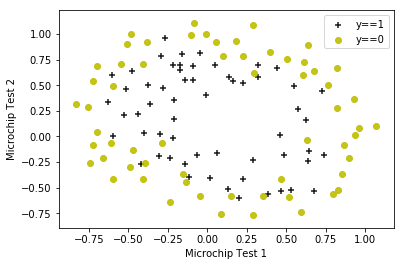

In [13]:
plotpoints(data)

In [14]:
#converting dataframe object to numpy array type object

In [15]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [16]:
#converting DataFrame object to numpy array type
data=data.as_matrix()

In [17]:
print(type(data))

<class 'numpy.ndarray'>


In [18]:
[m,n]=data.shape
print([m,n])

[118, 3]


In [19]:
#converting this data set into new by adding all powers of x1 and x2 upto degree of 6

In [20]:
#creating empty dataframe object
data_new=pd.DataFrame(None)
print(data_new)

Empty DataFrame
Columns: []
Index: []


In [21]:
print(type(data_new))
print(data_new.shape)

<class 'pandas.core.frame.DataFrame'>
(0, 0)


In [22]:
#   **Important**
k=0
degree=6
for i in range(1,degree+1):
    for j in range(0,i+1):
        k=k+1
        arr=(data[:,0]**(i-j))*(data[:,1]**j)
        name_col="Col%d"%(28-k)
        data_new.insert(0,name_col,np.array(arr),allow_duplicates=False)
        

In [23]:
#adding biased column to data_new
data_new.insert(0,"Extra",np.ones(m))

In [24]:
#new data set as desired in above discussion created
print(data_new)
print(data_new.shape)


     Extra          Col1          Col2          Col3          Col4  \
0      1.0  1.172060e-01  8.589398e-03  6.294709e-04  4.613055e-05   
1      1.0  1.032560e-01 -1.398103e-02  1.893054e-03 -2.563226e-04   
2      1.0  1.100469e-01 -3.397345e-02  1.048821e-02 -3.237900e-03   
3      1.0  1.604015e-02 -1.197765e-02  8.944062e-03 -6.678793e-03   
4      1.0  1.019299e-02 -1.123519e-02  1.238395e-02 -1.365016e-02   
5      1.0  8.527719e-05 -2.133027e-04  5.335313e-04 -1.334515e-03   
6      1.0  1.644718e-09 -1.905473e-08  2.207569e-07 -2.557560e-06   
7      1.0  5.048915e-05  8.033094e-05  1.278108e-04  2.033538e-04   
8      1.0  4.363507e-03 -1.803196e-04  7.451610e-06 -3.079338e-07   
9      1.0  1.841709e-02 -4.727468e-03  1.213490e-03 -3.114897e-04   
10     1.0  3.255123e-02 -2.219989e-02  1.514029e-02 -1.032565e-02   
11     1.0  2.004594e-02 -2.036055e-02  2.068010e-02 -2.100467e-02   
12     1.0  2.080355e-04 -5.459587e-04  1.432788e-03 -3.760142e-03   
13     1.0  4.001153

In [25]:
#new data set dimensions
print(data_new.shape)
print(type(data_new))

(118, 28)
<class 'pandas.core.frame.DataFrame'>


In [26]:
#converting dataframe object to numpy array type
data_new=data_new.as_matrix()

In [27]:
print(type(data_new))
print(data_new.shape)

<class 'numpy.ndarray'>
(118, 28)


In [28]:
#extracting input and output parts from training examples 
Y=data[:,2]
X=data_new

In [29]:
#Input part of training data set
print(X)

[[ 1.00000000e+00  1.17205992e-01  8.58939846e-03 ...  2.62830529e-03
   6.99560000e-01  5.12670000e-02]
 [ 1.00000000e+00  1.03255971e-01 -1.39810280e-02 ...  8.60107856e-03
   6.84940000e-01 -9.27420000e-02]
 [ 1.00000000e+00  1.10046893e-01 -3.39734512e-02 ...  4.56719641e-02
   6.92250000e-01 -2.13710000e-01]
 ...
 [ 1.00000000e+00  9.95627986e-01 -4.82684337e-01 ...  2.34691802e-01
   9.99270000e-01 -4.84450000e-01]
 [ 1.00000000e+00  9.95627986e-01 -6.31330588e-03 ...  4.01499650e-05
   9.99270000e-01 -6.33640000e-03]
 [ 1.00000000e+00  8.22905998e-10 -1.70067777e-08 ...  4.00246023e-01
  -3.06120000e-02  6.32650000e-01]]


In [30]:
#Output part of training data set
print(Y)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
print(type(X))
print(X.shape)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(118, 28)
<class 'numpy.ndarray'>
(118,)


In [32]:
#dimensions of input training examples viz. 'm' stands for number of training examples and 'n' stands for number of
# of features(including extra added biaed feature which has value 1 throughout)
[m,n]=X.shape
print([m,n])

[118, 28]


In [33]:
#initializing learning parameters to zero
theta=np.zeros(n)
print(theta)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [34]:
#initial error value at theta=[0,0,0.......0]
J_val=[compute_cost(theta,X,Y,m,0)]
print(J_val)

[0.6931471805599454]


In [35]:
#giving gradient descent number of iterations to perform ,say 400000
#setting value of alpha i.e. learning rate to 0.001
#and taking regularization parameter lambo to be 10
iterations=400000
alpha=0.1
lambo=0
ite=[i for i in range(0,iterations+1)]

In [36]:
#running gradient descent
for i in range(0,iterations):
    theta=(theta*(1-(lambo/m)))-(alpha/m)*(np.transpose(X).dot(gz(theta,X)-Y))
    J_val.append(compute_cost(theta,X,Y,m,lambo))

In [37]:
#final theta when alpha =0.01 and total number of iterations=400000
print(theta.shape)
print(theta)

(28,)
[  3.94768022   1.00252346  -8.20399755 -11.06962705   8.40897164
  -0.89953844  -2.6450293   -9.95847916   8.11437176 -10.65829812
  -6.89729544  12.16095353  -2.96422957  -3.22576162 -13.40632536
  -1.05239393  -6.97930337   4.61105356  -1.76266174  -4.92065704
   7.31999078   3.40865318   4.01139709  -3.82515126  -9.04368739
  -6.19378889   5.42538387   1.31077165]


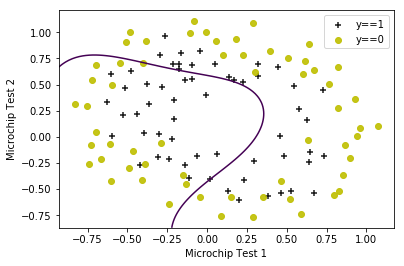

In [38]:
plotpoints(data)
decbound(theta,data)

Text(0,0.5,'In sample error')

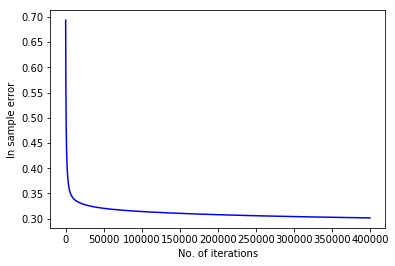

In [39]:
#plotting error in sample as a function of number of iterations of gradient descent
plt.plot(ite,np.array(J_val),c='b')
plt.xlabel("No. of iterations")
plt.ylabel("In sample error")


In [40]:
#now tring for different values of lambda and observing in sample error(it must increase)

In [48]:
#setting regularization parameter range
j_val=[]
lam=np.arange(0,10,1)

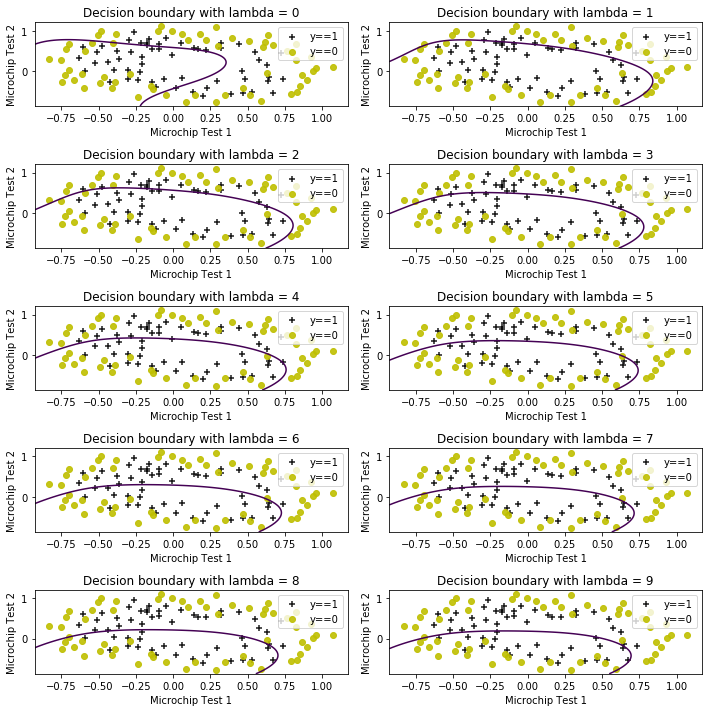

In [49]:
#running gradient descent with various values of regularization parameters
plotnum=1
plt.figure(figsize=(10,10))
for lambo in lam:
    theta=np.zeros(n)
    for i in range(0,iterations):
      theta=(theta*(1-lambo/m))-(alpha/m)*(np.transpose(X).dot(gz(theta,X)-Y))
    j_val.append(compute_cost(theta,X,Y,m,lambo))
    plt.subplot(5,2,plotnum)
    plotpoints(data)
    plt.hold(1)
    decbound(theta,data)
    plt.title("Decision boundary with lambda = %d"%(lambo))
    plotnum+=1
plt.tight_layout()


Text(0.5,1,'variation of in sample error with increasing regularization parameter')

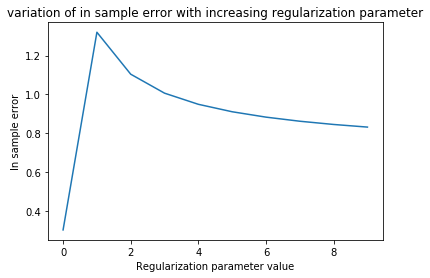

In [50]:
#plotting in sample error with different values of regularization parameter
plt.plot(lam,j_val)
plt.xlabel("Regularization parameter value")
plt.ylabel("In sample error")
plt.title("variation of in sample error with increasing regularization parameter")